# Nội Dung

Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại chất lượng rượu đỏ.

## Bài làm

### import thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dữ liệu

In [3]:
df = pd.read_csv('../data/winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Cái nhìn tổng quan về dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
print("Có tổng cộng {} giá trị null trong tập dữ liệu".format(df.isnull().sum().sum()))

Có tổng cộng 0 giá trị null trong tập dữ liệu


## EDA

### Biểu đồ histplot của acidity:

[Text(0.5, 1.0, 'Sự phân phối của volatile acidity')]

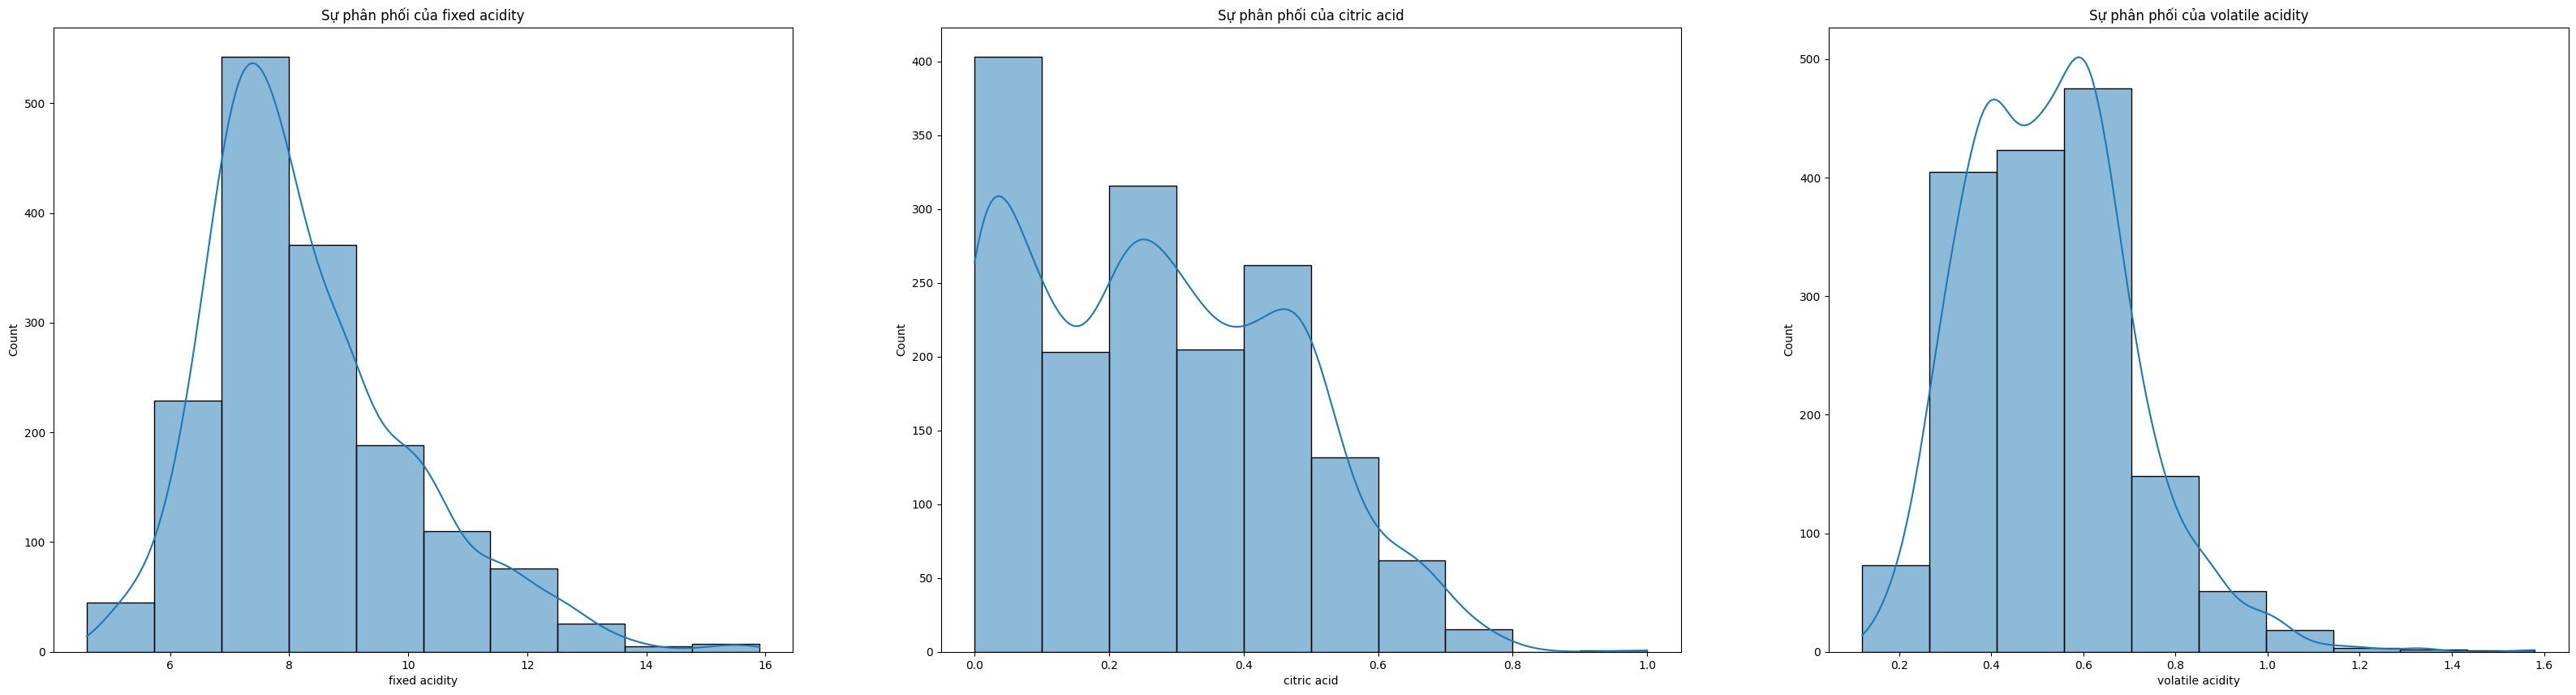

In [7]:
fig, ax = plt.subplots(1,3,figsize=(40,10))
sns.histplot(ax = ax[0], x = df['fixed acidity'],bins = 10,kde = True,cbar = True).set(title ="Sự phân phối của fixed acidity")
sns.histplot(ax = ax[1], x = df['citric acid'],bins = 10,kde = True,cbar = True).set(title= "Sự phân phối của citric acid")
sns.histplot(ax = ax[2], x = df['volatile acidity'],bins = 10,kde = True,cbar = True).set(title="Sự phân phối của volatile acidity")

Sau khi phân tích 3 biểu đồ trên:  biểu đồ 'fixed acidity' phân phối bình thường(nhưng có một chuốt lệch về phải). Nhưng mà 2 biểu đồ còn lại là phân phối hai đỉnh (Bimodal).

[Text(0.5, 1.0, 'Sự phân phối của chlorides')]

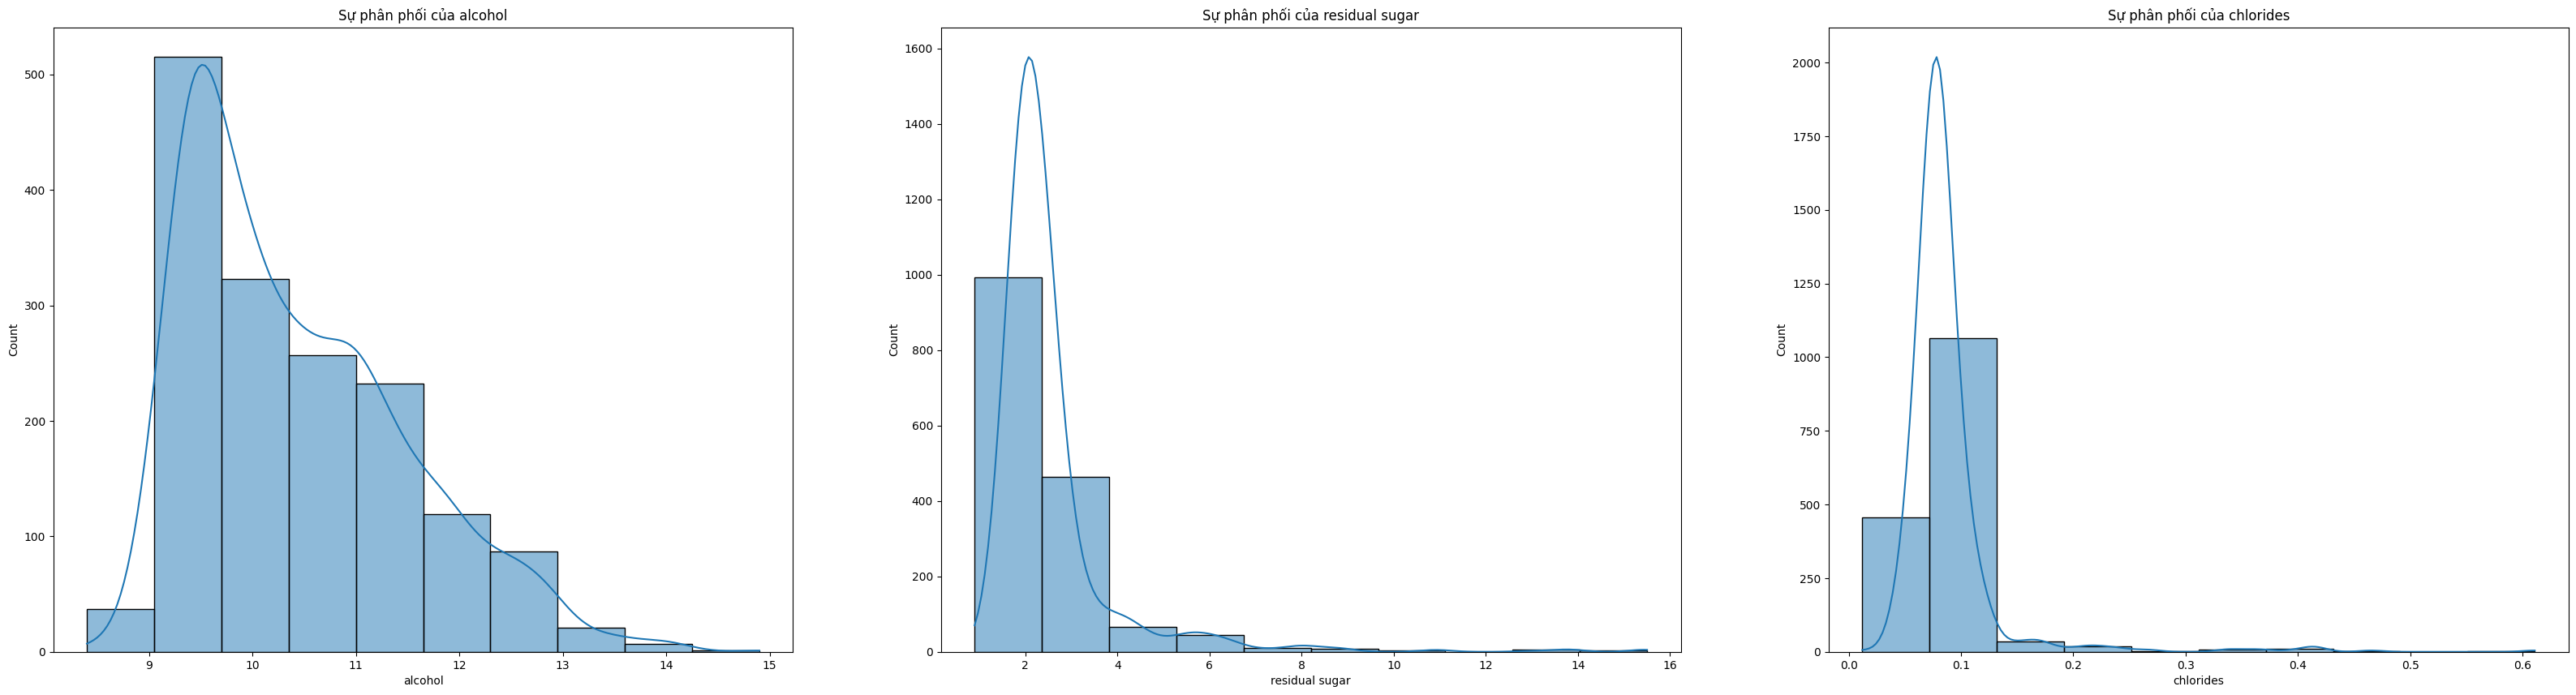

In [8]:
fig, ax = plt.subplots(1,3,figsize=(40,10))
sns.histplot(ax = ax[0], x = df['alcohol'],bins = 10,kde = True,cbar = True).set(title ="Sự phân phối của alcohol")
sns.histplot(ax = ax[1], x = df['residual sugar'],bins = 10,kde = True,cbar = True).set(title= "Sự phân phối của residual sugar")
sns.histplot(ax = ax[2], x = df['chlorides'],bins = 10,kde = True,cbar = True).set(title="Sự phân phối của chlorides")

Phân tích 3 biểu đồ tiếp theo: 3 biến alcohol, residual sugar và chlorides đều không phân bổ bình thường

### Pairplot

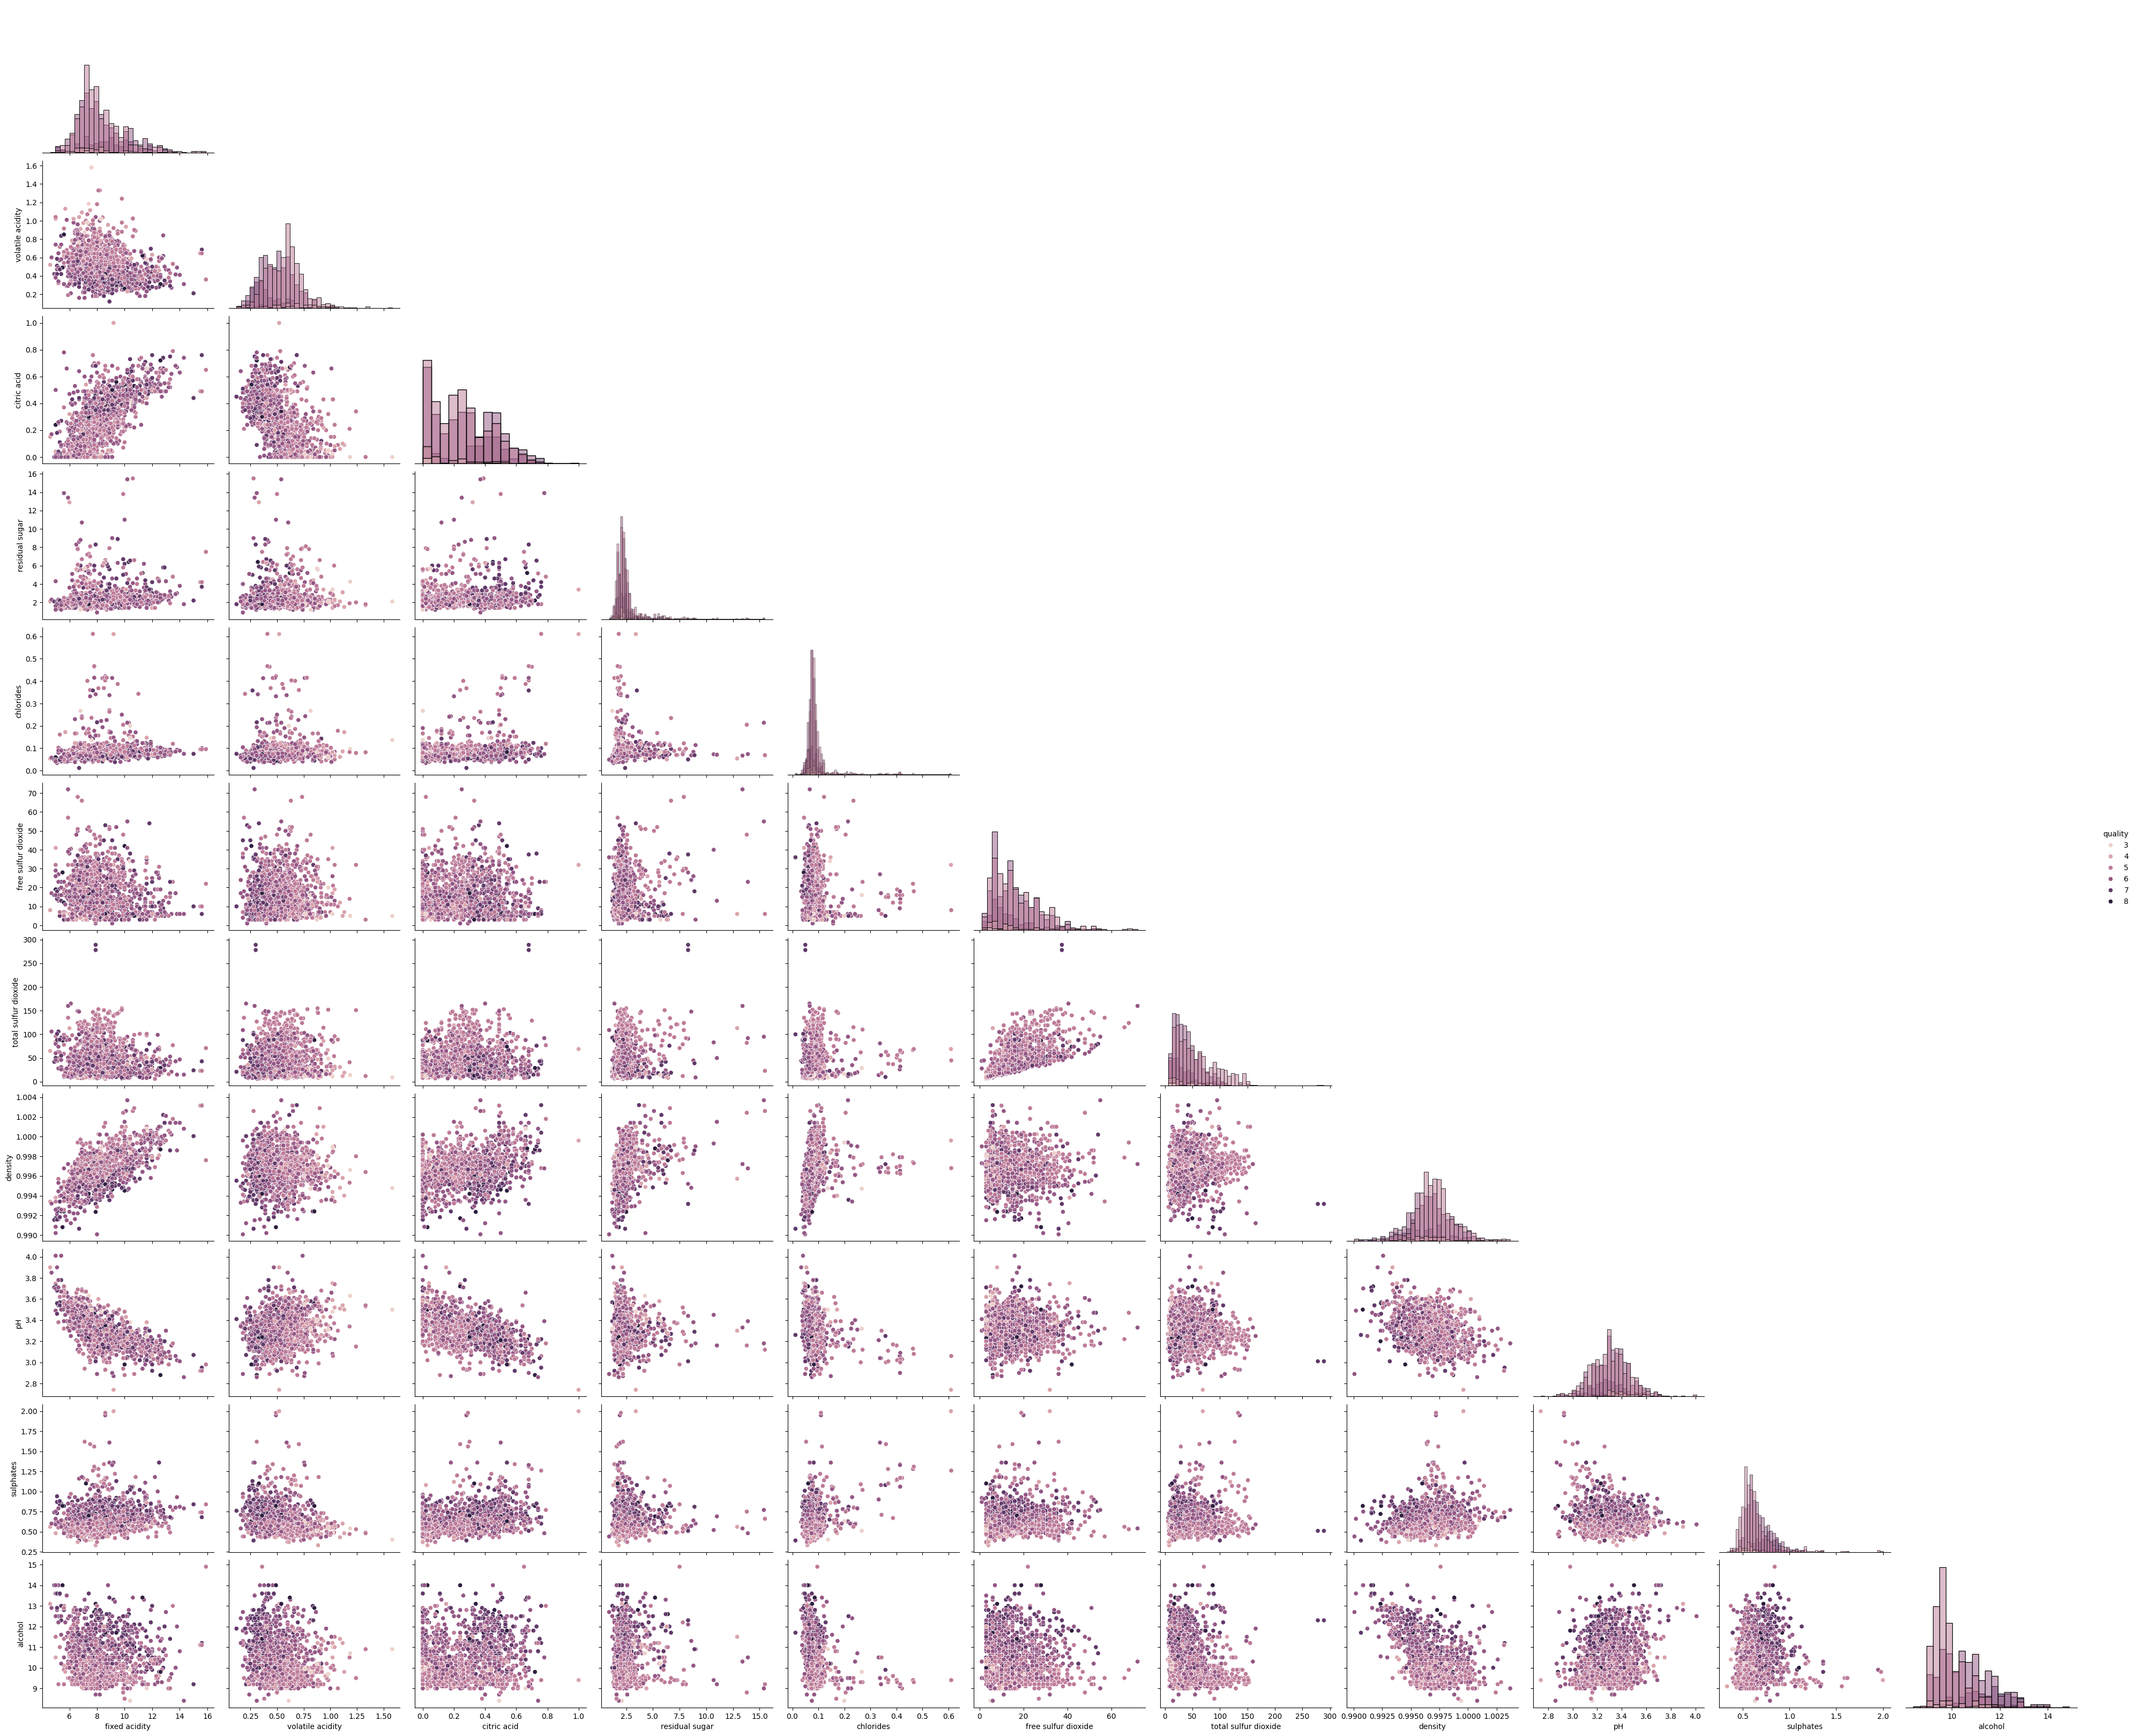

In [9]:
sns.pairplot(df, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True);

Dựa vào biểu đồ pairplot ta thấy sự tương quan với nhau giữa các biến độc lập. Đây là yếu tố không mong muốn. Vấn đề này gọi là hiện tượng Đa cộng tuyến (multicollinearity)

### Heatmap

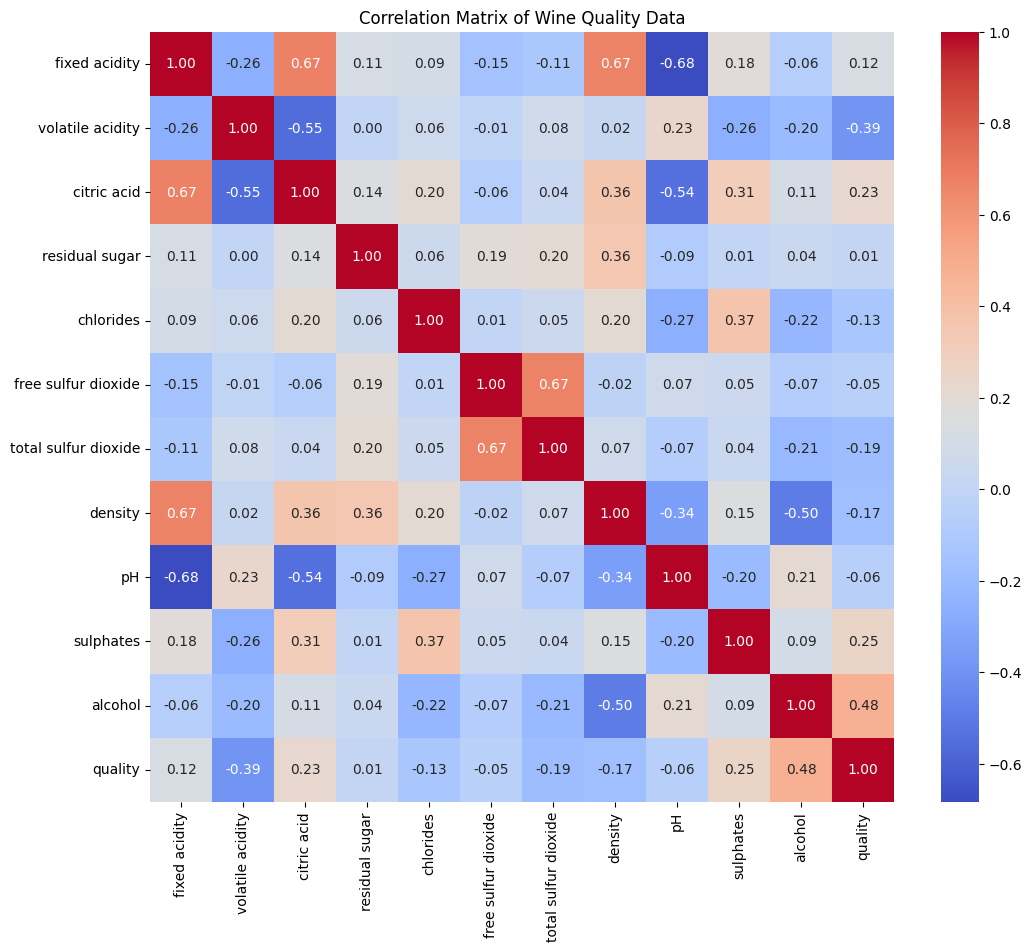

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Quality Data')
plt.show()

### Scatterplot

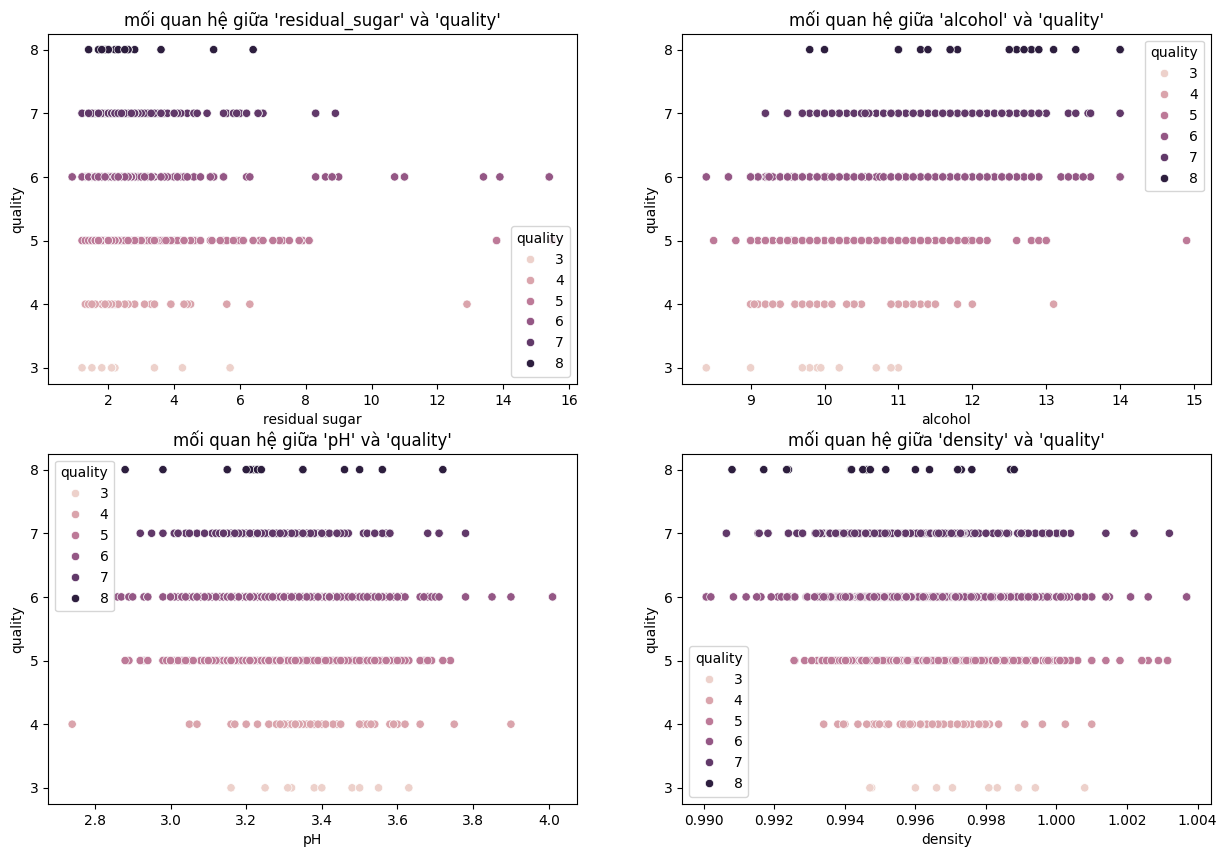

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual sugar",
                y = "quality", hue = "quality",
                data = df).set(title = "mối quan hệ giữa 'residual_sugar' và 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "mối quan hệ giữa 'alcohol' và 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = df).set(title = "mối quan hệ giữa 'pH' và 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = df).set(title = "mối quan hệ giữa 'density' và 'quality'");